### Que:  ) Prepare a classification model using Naive Bayes for salary data 


In [2]:
import numpy as np  
import pandas as pd 

In [3]:
df = pd.read_csv('SalaryData_Test.csv')
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [4]:
df = df.dropna()

In [5]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [6]:
x = df.drop('Salary', axis=1)
y = df['Salary']

In [7]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42) 

In [8]:
from sklearn.naive_bayes import GaussianNB  
model = GaussianNB()
model.fit(x_train, y_train)


GaussianNB()

In [9]:
predictions = model.predict(x_test)

In [10]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, predictions)
accuracy

0.7944223107569721

In [11]:
conf_matrix = confusion_matrix(y_test, predictions)
conf_matrix

array([[2678,  149],
       [ 625,  313]], dtype=int64)

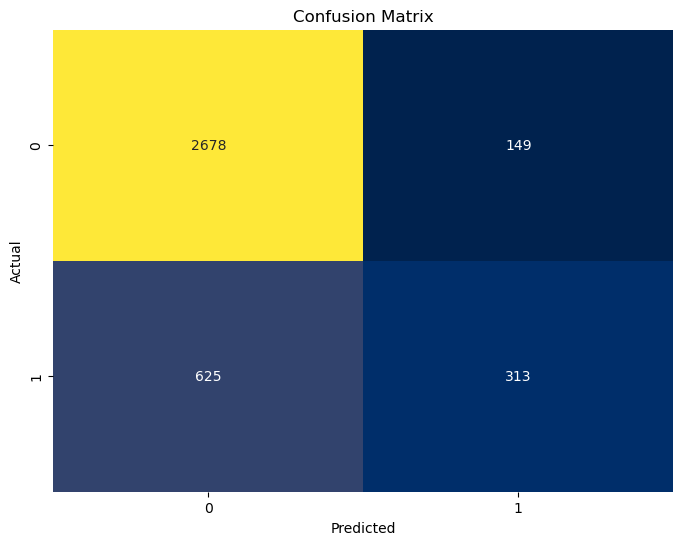

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='cividis', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [26]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.79
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.95      0.87      2827
           1       0.68      0.33      0.45       938

    accuracy                           0.79      3765
   macro avg       0.74      0.64      0.66      3765
weighted avg       0.78      0.79      0.77      3765

